In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/01_Jan.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.500000,77.000000,1,1,0,1549.0,1613.0,1699.0,1511.0,1495.0,1376.0,124.166667,1490.0
1,13.441667,78.083333,1,1,0,1521.0,1629.0,1662.0,1487.0,1454.0,1248.0,245.333333,1454.0
2,13.383333,79.166667,1,1,0,1526.0,1618.0,1644.0,1476.0,1429.0,1205.0,366.250000,1451.0
3,13.325000,80.250000,1,1,0,1519.0,1588.0,1621.0,1450.0,1271.0,1183.0,483.416667,1406.0
4,13.266667,81.333333,2,1,0,1490.0,1549.0,1613.0,1420.0,1282.0,1150.0,601.250000,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,11.412452,84.203770,23,4,1,1925.0,1956.0,2072.0,1832.0,1849.0,1620.0,1936.500000,1787.0
8636,11.412452,84.203770,24,4,1,1904.0,1948.0,2046.0,1793.0,1817.0,1587.0,1913.833333,1774.0
8637,11.412452,84.203770,24,4,1,1877.0,1947.0,2016.0,1730.0,1771.0,1562.0,1891.416667,1747.0
8638,11.312452,84.203770,24,4,1,1871.0,1977.0,1984.0,1702.0,1716.0,1517.0,1867.833333,1701.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974


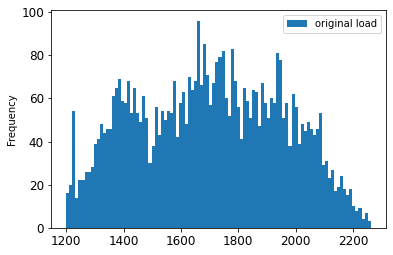

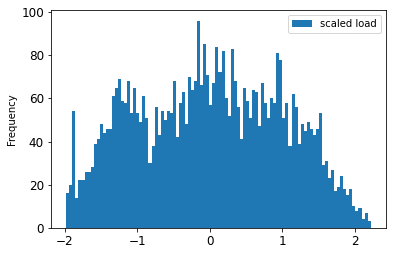

In [8]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

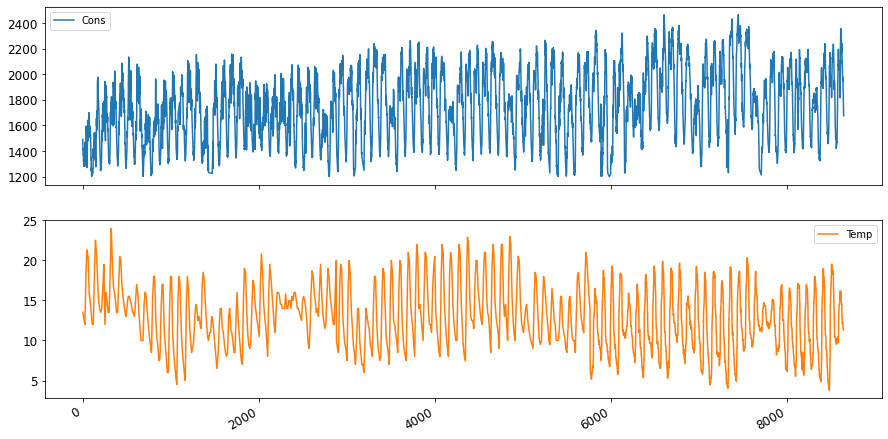

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795,-0.973338
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322,-0.985191
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873,-1.162992
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789,-1.131383
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974,-1.293379
5,-1.293379,-0.127822,0.694152,-1.516238,-1.479804,-1.332948,-0.972336,-0.706612,-0.278744,-1.299872,-1.364162,-2.126313,-4.026158,-1.289428
6,-1.289428,-0.143516,0.759404,-1.516238,-1.479804,-1.332948,-0.984185,-0.686865,-0.322185,-1.415928,-1.399894,-2.023697,-3.557001,-1.360548
7,-1.360548,-0.159210,0.824657,-1.516238,-1.479804,-1.332948,-1.161925,-0.714511,-0.440660,-1.515976,-1.471359,-2.153940,-3.093990,-1.431668
8,-1.431668,-0.174904,0.889909,-1.371801,-1.479804,-1.332948,-1.130327,-0.829041,-0.594678,-1.423932,-1.542824,-2.161834,-2.637126,-1.498837
9,-1.498837,-0.190598,0.955162,-1.371801,-1.479804,-1.332948,-1.292268,-0.971217,-0.705254,-1.503971,-1.586497,-1.561925,-2.186066,-1.463277


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,0.318679,-0.073811,-0.519177,1.372493,1.520424,-1.332948,0.102003,0.829678,1.439147,0.412950,0.632882,0.375940,0.560928,0.144829
4792,0.144829,-0.037124,-0.573934,1.516930,1.520424,-1.332948,0.030907,0.644059,1.348316,0.344918,0.497893,0.253590,0.457126,0.030247
4793,0.030247,-0.000437,-0.628691,1.516930,1.520424,-1.332948,0.086204,0.466339,1.154806,0.188843,0.414517,0.281218,0.360153,0.144829
4794,0.144829,0.036251,-0.683449,1.516930,1.520424,-1.332948,0.319241,0.209633,0.898110,0.312902,0.378785,0.285164,0.295277,0.136927
4795,0.136927,0.072938,-0.738206,1.516930,1.520424,-1.332948,0.319241,0.103001,0.830974,0.164831,0.227915,0.052305,0.235522,-0.206820
4796,-0.206820,0.109625,-0.792963,1.661366,1.520424,-1.332948,0.145451,0.031913,0.645363,-0.011253,0.005580,-0.105566,0.162110,-0.222625
4797,-0.222625,0.146312,-0.847720,1.661366,1.520424,-1.332948,0.030907,0.087204,0.467650,-0.223355,-0.093677,-0.164768,0.102697,-0.139651
4798,-0.139651,0.182999,-0.902478,1.661366,1.520424,-1.332948,0.145451,0.320214,0.210954,-0.131311,-0.014271,-0.184501,0.072649,-0.246332
4799,-0.246332,0.219686,-0.957235,1.661366,1.520424,-1.332948,0.137551,0.320214,0.104326,-0.311398,-0.121469,-0.342372,0.042601,-0.432034
4800,-0.432034,0.219686,-0.957235,-1.660674,-1.479804,-1.332948,-0.206079,0.146444,0.033241,-0.319402,-0.335863,-0.433148,0.002651,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,0.318679,-0.073811,-0.519177,1.372493,1.520424,-1.332948,0.102003,0.829678,1.439147,0.412950,0.632882,0.375940,0.560928,0.144829
4792,0.144829,-0.037124,-0.573934,1.516930,1.520424,-1.332948,0.030907,0.644059,1.348316,0.344918,0.497893,0.253590,0.457126,0.030247
4793,0.030247,-0.000437,-0.628691,1.516930,1.520424,-1.332948,0.086204,0.466339,1.154806,0.188843,0.414517,0.281218,0.360153,0.144829
4794,0.144829,0.036251,-0.683449,1.516930,1.520424,-1.332948,0.319241,0.209633,0.898110,0.312902,0.378785,0.285164,0.295277,0.136927
4795,0.136927,0.072938,-0.738206,1.516930,1.520424,-1.332948,0.319241,0.103001,0.830974,0.164831,0.227915,0.052305,0.235522,-0.206820
4796,-0.206820,0.109625,-0.792963,1.661366,1.520424,-1.332948,0.145451,0.031913,0.645363,-0.011253,0.005580,-0.105566,0.162110,-0.222625
4797,-0.222625,0.146312,-0.847720,1.661366,1.520424,-1.332948,0.030907,0.087204,0.467650,-0.223355,-0.093677,-0.164768,0.102697,-0.139651
4798,-0.139651,0.182999,-0.902478,1.661366,1.520424,-1.332948,0.145451,0.320214,0.210954,-0.131311,-0.014271,-0.184501,0.072649,-0.246332
4799,-0.246332,0.219686,-0.957235,1.661366,1.520424,-1.332948,0.137551,0.320214,0.104326,-0.311398,-0.121469,-0.342372,0.042601,-0.432034
4800,-0.432034,0.219686,-0.957235,-1.660674,-1.479804,-1.332948,-0.206079,0.146444,0.033241,-0.319402,-0.335863,-0.433148,0.002651,-0.432034


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-0.973338
1,-0.985191
2,-1.162992
3,-1.131383
4,-1.293379
...,...
4796,-0.222625
4797,-0.139651
4798,-0.246332
4799,-0.432034


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,-0.206820,0.109625,-0.792963,1.661366,1.520424,-1.332948,0.145451,0.031913,0.645363,-0.011253,0.005580,-0.105566,0.162110
4797,-0.222625,0.146312,-0.847720,1.661366,1.520424,-1.332948,0.030907,0.087204,0.467650,-0.223355,-0.093677,-0.164768,0.102697
4798,-0.139651,0.182999,-0.902478,1.661366,1.520424,-1.332948,0.145451,0.320214,0.210954,-0.131311,-0.014271,-0.184501,0.072649
4799,-0.246332,0.219686,-0.957235,1.661366,1.520424,-1.332948,0.137551,0.320214,0.104326,-0.311398,-0.121469,-0.342372,0.042601


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4801, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1561.0,14.291667,56.333333,1.0,1.0,0.0,1644.0,1708.0,1722.0,1562.000000,1579.0,1543.0,1685.500000
4802,1533.0,14.083333,57.666667,1.0,1.0,0.0,1665.0,1737.0,1781.0,1551.000000,1558.0,1526.0,1664.833333
4803,1521.0,13.875000,59.000000,1.0,1.0,0.0,1638.0,1735.0,1781.0,1551.000000,1540.0,1514.0,1643.166667
4804,1505.0,13.666667,60.333333,2.0,1.0,0.0,1591.0,1648.0,1737.0,1525.000000,1509.0,1476.0,1623.833333
4805,1467.0,13.458333,61.666667,2.0,1.0,0.0,1561.0,1644.0,1708.0,1500.000000,1483.0,1461.0,1603.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,1656.0,14.272727,66.454545,24.0,3.0,1.0,1779.0,1753.0,1861.0,1621.500000,1512.0,1638.0,1760.916667
5758,1644.0,14.136364,66.727273,24.0,3.0,1.0,1775.0,1813.0,1788.0,1613.666667,1487.0,1615.0,1748.916667
5759,1617.0,14.000000,67.000000,24.0,3.0,1.0,1747.0,1813.0,1781.0,1605.833333,1471.0,1591.0,1735.250000
5760,1688.0,7.102451,92.420395,1.0,3.0,0.0,1851.0,1942.0,1954.0,1549.000000,1717.0,1698.0,1856.916667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.52488,-0.333372,-0.102733,-0.052074,-0.625935,-0.621265,-0.843758,-0.192961
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.52488,-0.257744,0.001657,0.160300,-0.665541,-0.697058,-0.905355,-0.271178
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.52488,-0.354980,-0.005542,0.160300,-0.665541,-0.762024,-0.948836,-0.353179
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.52488,-0.524241,-0.318712,0.001920,-0.759154,-0.873910,-1.086524,-0.426350
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.52488,-0.632280,-0.333111,-0.102467,-0.849166,-0.967749,-1.140875,-0.502358
4806,-0.977340,-0.083485,-0.748969,-1.513750,-1.227139,-1.52488,-0.733117,-0.257518,0.001920,-0.942779,-1.000232,-1.195225,-0.588145
4807,-0.980941,-0.146509,-0.658662,-1.513750,-1.227139,-1.52488,-0.776332,-0.354709,-0.005279,-1.011189,-1.054370,-1.166238,-0.673615
4808,-1.088997,-0.209533,-0.568355,-1.369419,-1.227139,-1.52488,-0.833953,-0.523893,-0.318441,-1.090400,-1.079635,-1.220589,-0.741109
4809,-1.143025,-0.272557,-0.478048,-1.369419,-1.227139,-1.52488,-0.970803,-0.631883,-0.332839,-1.126405,-1.137382,-1.274940,-0.812071
4810,-1.179044,-0.335582,-0.387741,-1.369419,-1.227139,-1.52488,-0.978005,-0.732673,-0.257248,-1.256023,-1.205957,-1.274940,-0.892811


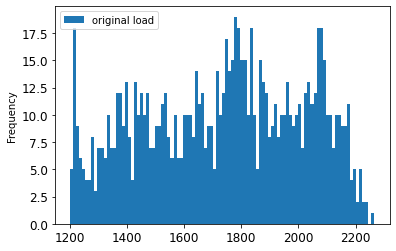

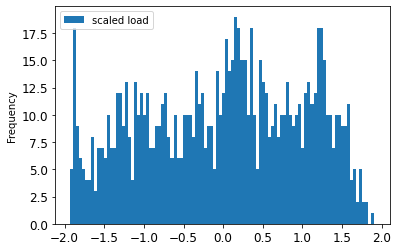

In [19]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5761)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.52488,-0.333372,-0.102733,-0.052074,-0.625935,-0.621265,-0.843758,-0.192961,-0.732413
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.52488,-0.257744,0.001657,0.160300,-0.665541,-0.697058,-0.905355,-0.271178,-0.775635
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.52488,-0.354980,-0.005542,0.160300,-0.665541,-0.762024,-0.948836,-0.353179,-0.833265
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.52488,-0.524241,-0.318712,0.001920,-0.759154,-0.873910,-1.086524,-0.426350,-0.970136
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.52488,-0.632280,-0.333111,-0.102467,-0.849166,-0.967749,-1.140875,-0.502358,-0.977340
4806,-0.977340,-0.083485,-0.748969,-1.513750,-1.227139,-1.52488,-0.733117,-0.257518,0.001920,-0.942779,-1.000232,-1.195225,-0.588145,-0.980941
4807,-0.980941,-0.146509,-0.658662,-1.513750,-1.227139,-1.52488,-0.776332,-0.354709,-0.005279,-1.011189,-1.054370,-1.166238,-0.673615,-1.088997
4808,-1.088997,-0.209533,-0.568355,-1.369419,-1.227139,-1.52488,-0.833953,-0.523893,-0.318441,-1.090400,-1.079635,-1.220589,-0.741109,-1.143025
4809,-1.143025,-0.272557,-0.478048,-1.369419,-1.227139,-1.52488,-0.970803,-0.631883,-0.332839,-1.126405,-1.137382,-1.274940,-0.812071,-1.179044
4810,-1.179044,-0.335582,-0.387741,-1.369419,-1.227139,-1.52488,-0.978005,-0.732673,-0.257248,-1.256023,-1.205957,-1.274940,-0.892811,-1.243877


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5752,0.175256,0.432168,-0.607351,1.517204,-0.205232,0.655789,0.015955,0.498410,1.153777,-0.337895,-0.448023,0.105566,0.437818,0.153645
5753,0.153645,0.390916,-0.588879,1.517204,-0.205232,0.655789,0.059170,0.448015,1.099784,-0.255083,-0.614046,0.011358,0.354871,0.139238
5754,0.139238,0.349664,-0.570407,1.517204,-0.205232,0.655789,0.275249,0.185240,0.955802,-0.327093,-0.476896,-0.021252,0.283277,0.038386
5755,0.038386,0.308411,-0.551935,1.517204,-0.205232,0.655789,0.275249,0.160042,0.847815,-0.355297,-0.606828,-0.155317,0.212315,-0.130902
5756,-0.130902,0.267159,-0.533463,1.661535,-0.205232,0.655789,0.174412,0.016056,0.498658,-0.383501,-0.798116,-0.343732,0.157122,-0.289384
5757,-0.289384,0.225907,-0.514992,1.661535,-0.205232,0.655789,0.152804,0.059252,0.448264,-0.411705,-0.863082,-0.499537,0.092467,-0.332606
5758,-0.332606,0.184655,-0.496520,1.661535,-0.205232,0.655789,0.138399,0.275232,0.185497,-0.439909,-0.953312,-0.582875,0.047051,-0.429857
5759,-0.429857,0.143403,-0.478048,1.661535,-0.205232,0.655789,0.037563,0.275232,0.160300,-0.468113,-1.011060,-0.669836,-0.004673,-0.174124
5760,-0.174124,-1.943218,1.243683,-1.658081,-0.205232,-1.524880,0.412098,0.739588,0.783023,-0.672742,-0.123194,-0.282135,0.455796,-0.264171
5761,-0.264171,-1.943218,1.243683,-1.658081,-0.205232,-1.524880,0.217628,0.714390,0.775824,-0.762754,-0.231470,-0.379966,0.364648,-0.264171


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4801,-0.732413
4802,-0.775635
4803,-0.833265
4804,-0.970136
4805,-0.977340
...,...
5757,-0.332606
5758,-0.429857
5759,-0.174124
5760,-0.264171


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.524880,-0.333372,-0.102733,-0.052074,-0.625935,-0.621265,-0.843758,-0.192961
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.524880,-0.257744,0.001657,0.160300,-0.665541,-0.697058,-0.905355,-0.271178
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.524880,-0.354980,-0.005542,0.160300,-0.665541,-0.762024,-0.948836,-0.353179
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.524880,-0.524241,-0.318712,0.001920,-0.759154,-0.873910,-1.086524,-0.426350
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.524880,-0.632280,-0.333111,-0.102467,-0.849166,-0.967749,-1.140875,-0.502358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-0.289384,0.225907,-0.514992,1.661535,-0.205232,0.655789,0.152804,0.059252,0.448264,-0.411705,-0.863082,-0.499537,0.092467
5758,-0.332606,0.184655,-0.496520,1.661535,-0.205232,0.655789,0.138399,0.275232,0.185497,-0.439909,-0.953312,-0.582875,0.047051
5759,-0.429857,0.143403,-0.478048,1.661535,-0.205232,0.655789,0.037563,0.275232,0.160300,-0.468113,-1.011060,-0.669836,-0.004673
5760,-0.174124,-1.943218,1.243683,-1.658081,-0.205232,-1.524880,0.412098,0.739588,0.783023,-0.672742,-0.123194,-0.282135,0.455796


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
401/401 [==============================] - 6s 14ms/step - loss: 0.1910 - val_loss: 0.1032
Epoch 2/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0785 - val_loss: 0.0577
Epoch 3/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0606 - val_loss: 0.0474
Epoch 4/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0511 - val_loss: 0.0254
Epoch 5/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0474 - val_loss: 0.0354
Epoch 6/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0485 - val_loss: 0.0318
Epoch 7/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0454 - val_loss: 0.0245
Epoch 8/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0440 - val_loss: 0.0260
Epoch 9/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0426 - val_loss: 0.0220
Epoch 10/300
401/401 [==============================] - 5s 11ms/step - loss: 0.041

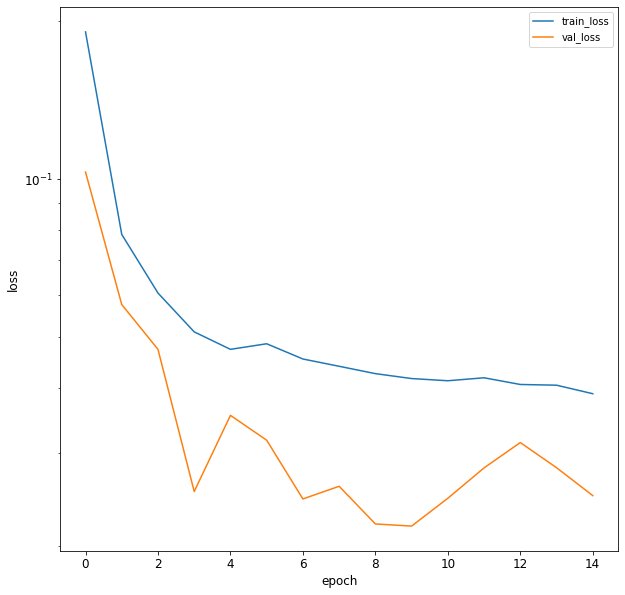

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5762][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,1636.0,6.562451,94.353337,1.0,3.0,0.0,1746.0,1855.0,1982.0,1510.0,1676.0,1659.0,1804.000000
5763,1613.0,6.022451,96.286280,1.0,3.0,0.0,1720.0,1849.0,1966.0,1492.0,1638.0,1616.0,1774.583333
5764,1601.0,6.022451,96.286280,2.0,3.0,0.0,1688.0,1851.0,1942.0,1469.0,1619.0,1607.0,1746.166667
5765,1569.0,6.022451,96.286280,2.0,3.0,0.0,1663.0,1797.0,1935.0,1422.0,1609.0,1600.0,1715.666667
5766,1577.0,5.842451,96.144815,2.0,3.0,0.0,1636.0,1746.0,1855.0,1465.0,1607.0,1558.0,1692.500000
5767,1570.0,5.662451,96.003350,2.0,3.0,0.0,1613.0,1720.0,1849.0,1445.0,1622.0,1576.0,1669.250000
5768,1562.0,5.662451,96.003350,3.0,3.0,0.0,1601.0,1688.0,1851.0,1432.0,1594.0,1568.0,1645.166667
5769,1549.0,5.662451,96.003350,3.0,3.0,0.0,1569.0,1663.0,1797.0,1431.0,1570.0,1554.0,1624.500000
5770,1528.0,5.467451,96.230240,3.0,3.0,0.0,1577.0,1636.0,1746.0,1406.0,1563.0,1518.0,1606.333333
5771,1519.0,5.272451,96.457130,3.0,3.0,0.0,1570.0,1613.0,1720.0,1388.0,1546.0,1505.0,1589.583333


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 5762 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2878 non-null   float64
 1   Temp    2878 non-null   float64
 2   Hum     2878 non-null   float64
 3   A       2878 non-null   float64
 4   B       2878 non-null   float64
 5   C       2878 non-null   float64
 6   D       2878 non-null   float64
 7   E       2878 non-null   float64
 8   F       2878 non-null   float64
 9   G       2878 non-null   float64
 10  H       2878 non-null   float64
 11  I       2878 non-null   float64
 12  J       2878 non-null   float64
dtypes: float64(13)
memory usage: 314.8 KB


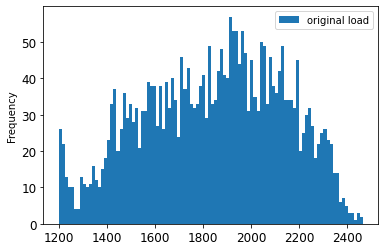

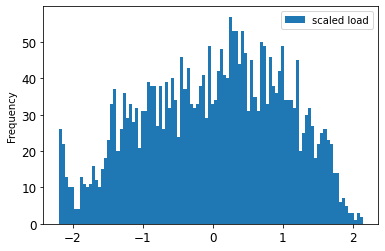

In [33]:
stlf_data[stlf_data.index >= 5762][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5762][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,-0.555359,-0.624190,-0.132824,-0.783351
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,-0.686927,-0.773581,-0.238341,-0.824569
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,-0.752711,-0.804849,-0.340272,-0.934483
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,-0.787335,-0.829168,-0.449675,-0.907004
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,-0.794259,-0.975085,-0.532773,-0.931048
5767,-0.931048,-1.547201,1.170002,-1.518946,-0.498368,-1.415689,-0.783226,-0.415617,0.027429,-1.356978,-0.742324,-0.912549,-0.616171,-0.958527
5768,-0.958527,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.824442,-0.525529,0.034299,-1.401687,-0.839270,-0.940343,-0.702557,-1.003179
5769,-1.003179,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.934352,-0.611397,-0.151175,-1.405127,-0.922365,-0.988982,-0.776688,-1.075310
5770,-1.075310,-1.596243,1.182329,-1.374395,-0.498368,-1.415689,-0.906875,-0.704135,-0.326343,-1.491107,-0.946602,-1.114054,-0.841852,-1.106223
5771,-1.106223,-1.645285,1.194657,-1.374395,-0.498368,-1.415689,-0.930918,-0.783133,-0.415645,-1.553012,-1.005461,-1.159219,-0.901934,-1.271094


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8635,-0.185694,-0.101094,0.528887,1.516636,0.016827,0.70637,0.288395,0.394979,0.793364,-0.026005,0.043624,-0.759684,0.342451,-0.230347
8636,-0.230347,-0.101094,0.528887,1.661188,0.016827,0.70637,0.216266,0.367501,0.704062,-0.160134,-0.067171,-0.874333,0.261146,-0.323086
8637,-0.323086,-0.101094,0.528887,1.661188,0.016827,0.70637,0.123530,0.364066,0.601022,-0.376804,-0.226438,-0.961188,0.180738,-0.481088
8638,-0.481088,-0.126244,0.528887,1.661188,0.016827,0.70637,0.102922,0.467108,0.491112,-0.473102,-0.416866,-1.117528,0.096145,-0.570393
8639,-0.570393,-0.126244,0.612473,1.661188,0.016827,0.70637,-0.185592,0.288502,0.394941,-0.676015,-0.513811,-1.207858,0.012150,-0.570393


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5762,-0.783351
5763,-0.824569
5764,-0.934483
5765,-0.907004
5766,-0.931048
...,...
8635,-0.230347
8636,-0.323086
8637,-0.481088
8638,-0.570393


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,-0.555359,-0.624190,-0.132824
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,-0.686927,-0.773581,-0.238341
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,-0.752711,-0.804849,-0.340272
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,-0.787335,-0.829168,-0.449675
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,-0.794259,-0.975085,-0.532773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,-0.185694,-0.101094,0.528887,1.516636,0.016827,0.706370,0.288395,0.394979,0.793364,-0.026005,0.043624,-0.759684,0.342451
8636,-0.230347,-0.101094,0.528887,1.661188,0.016827,0.706370,0.216266,0.367501,0.704062,-0.160134,-0.067171,-0.874333,0.261146
8637,-0.323086,-0.101094,0.528887,1.661188,0.016827,0.706370,0.123530,0.364066,0.601022,-0.376804,-0.226438,-0.961188,0.180738
8638,-0.481088,-0.126244,0.528887,1.661188,0.016827,0.706370,0.102922,0.467108,0.491112,-0.473102,-0.416866,-1.117528,0.096145


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2878, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2878,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-0.7227058 ],
       [-0.81275666],
       [-0.84805274],
       ...,
       [-0.32232246],
       [-0.45255232],
       [-0.5378323 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5953][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1844.19278
dtype: float64
Cons    289.630828
dtype: float64


In [42]:
load_mean=1844.19278
load_std=289.630828
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2878, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2878, 1)


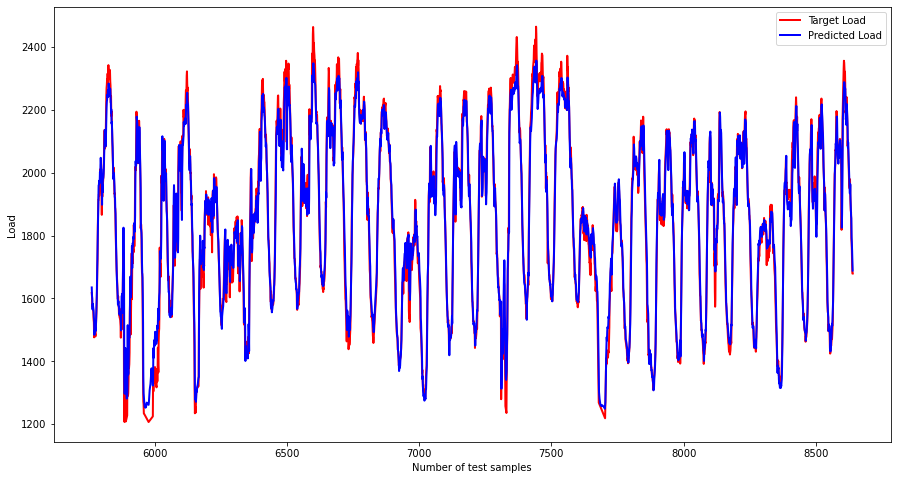

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.8867093068377891


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.338823
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5762  161629.927937
5763  160437.008284
5764  157252.183606
5765  158050.685705
5766  157352.759034
...             ...
8635  177646.657820
8636  174960.183914
8637  170382.795816
8638  167796.909610
8639  167798.380715

[2878 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5762   308.520024
5763    11.704069
5764   626.641675
5765   275.491097
5766    61.520913
...           ...
8635   364.081299
8636   702.526303
8637  2114.466333
8638  1164.870892
8639    88.934292

[2878 rows x 1 columns]
y_t+1    2211.329351
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    47.024774
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[1634.8749]
[1608.7933]
[1598.5706]
[1564.8984]
[1582.3761]
[1575.4678]
[1570.2406]
[1560.3301]
[1539.4758]
[1529.9055]
[1483.8723]
[1499.1283]
[1497.1117]
[1493.012]
[1505.8152]
[1497.6089]
[1516.8799]
[1546.7988]
[1573.5725]
[1606.4851]
[1656.959]
[1692.8158]
[1766.4197]
[1792.5679]
[1876.1531]
[1916.3405]
[1959.6406]
[1961.4635]
[1974.5378]
[1966.136]
[1970.1118]
[2001.5818]
[1985.4056]
[2025.8448]
[2047.5391]
[2027.8752]
[2012.4551]
[2010.5618]
[1941.6364]
[1898.1641]
[1961.9121]
[1937.5586]
[1981.7622]
[1980.9308]
[1985.7737]
[1997.3209]
[2019.5665]
[2056.892]
[2099.3474]
[2136.302]
[2134.941]
[2083.4897]
[2094.4229]
[2086.0588]
[2125.7805]
[2177.477]
[2207.8765]
[2225.9265]
[2231.8687]
[2248.157]
[2240.8887]
[2262.6333]
[2242.6213]
[2267.7988]
[2283.8416]
[2264.6492]
[2258.191]
[2245.387]
[2259.6792]
[2268.4346]
[2266.4841]
[2240.5657]
[2229.4097]
[2190.6616]
[2201.7375]
[2156.3643]
[2161.7236]
[2136.8047]
[2099.8823]
[2080.6208]
[2036.5712]
[2001.8105]
[1979.4702]
[1990.9865]
[1

[2146.436]
[2093.7092]
[2039.0475]
[2050.2764]
[2017.2954]
[2073.5215]
[2099.7305]
[2078.4126]
[2014.783]
[2007.2518]
[2043.0288]
[2088.2026]
[2189.981]
[2208.1196]
[2248.271]
[2272.4526]
[2254.2507]
[2254.714]
[2278.342]
[2280.7725]
[2256.9692]
[2301.851]
[2200.3298]
[2074.6072]
[2195.3252]
[2220.3872]
[2263.3516]
[2263.6875]
[2273.3794]
[2257.0505]
[2274.185]
[2266.6626]
[2214.1602]
[2216.6018]
[2204.6045]
[2186.9844]
[2158.5835]
[2130.7913]
[2063.6106]
[2034.325]
[2063.2275]
[2088.468]
[2061.5593]
[2035.9297]
[1997.9161]
[1978.6083]
[1962.9689]
[1915.4789]
[1859.5854]
[1813.728]
[1794.2811]
[1753.1313]
[1718.628]
[1706.4331]
[1699.6697]
[1662.7587]
[1651.773]
[1648.7926]
[1628.5708]
[1629.5359]
[1628.6958]
[1613.25]
[1566.8293]
[1578.1752]
[1597.1818]
[1597.0402]
[1609.228]
[1612.1763]
[1618.2236]
[1621.0356]
[1665.8147]
[1695.0822]
[1707.0778]
[1734.2504]
[1759.3497]
[1846.4796]
[1918.1604]
[1992.2826]
[2039.6632]
[2076.6562]
[2059.5427]
[1982.6176]
[1910.4979]
[1913.0665]
[1932.87

[2224.8994]
[2179.1406]
[2150.851]
[2142.02]
[2117.5068]
[2093.485]
[2030.4712]
[1974.47]
[1959.7867]
[1925.5791]
[1925.1342]
[1964.1914]
[1924.4515]
[1909.541]
[1882.4172]
[1854.1547]
[1840.2123]
[1810.82]
[1778.9957]
[1718.4253]
[1691.5565]
[1631.6571]
[1606.0414]
[1578.1942]
[1567.9824]
[1543.5872]
[1516.9647]
[1519.2845]
[1517.6044]
[1521.8185]
[1501.1407]
[1489.1189]
[1490.9468]
[1449.6221]
[1492.5818]
[1491.9305]
[1498.2059]
[1504.1656]
[1520.0212]
[1541.8334]
[1561.6924]
[1558.883]
[1606.047]
[1641.5758]
[1717.155]
[1803.536]
[1855.1204]
[1928.1052]
[1996.0786]
[2047.1862]
[2080.5293]
[2092.8496]
[2072.2979]
[2075.4556]
[2082.1357]
[2135.0852]
[2150.1213]
[2166.7034]
[2063.2773]
[1926.0879]
[1934.7345]
[1950.7572]
[2000.671]
[2051.0513]
[2044.5148]
[2021.9719]
[2004.3882]
[2034.2427]
[2043.8616]
[2037.1287]
[2036.331]
[2015.3428]
[2006.9519]
[1939.0216]
[1899.4233]
[1924.8204]
[1938.0795]
[2015.0461]
[2101.1401]
[2130.907]
[2154.7466]
[2185.1433]
[2203.6653]
[2199.231]
[2230.002

[1974.7689]
[2015.542]
[2041.1016]
[1989.6616]
[1918.2897]
[1867.8602]
[1893.9337]
[1880.8329]
[1898.9602]
[1889.5383]
[1863.1995]
[1886.5013]
[1867.7815]
[1907.8732]
[1908.376]
[1925.1628]
[1932.3066]
[1921.5103]
[1897.398]
[1850.2134]
[1855.4463]
[1858.3058]
[1872.1013]
[1928.2051]
[1983.6624]
[2016.7208]
[2038.0868]
[2054.0273]
[2066.8865]
[2091.0513]
[2132.0603]
[2113.933]
[2133.5823]
[2107.8225]
[2078.2354]
[2032.9087]
[2008.3604]
[2102.3792]
[2127.3606]
[2133.3916]
[2123.536]
[2113.879]
[2110.4478]
[2077.0493]
[2071.1475]
[2044.9772]
[2010.4313]
[1987.0557]
[1955.0107]
[1908.3813]
[1866.0015]
[1864.7285]
[1901.6891]
[1867.3103]
[1844.5968]
[1811.6239]
[1798.2136]
[1770.5316]
[1722.6577]
[1689.5612]
[1645.3171]
[1620.912]
[1557.437]
[1543.8871]
[1529.1329]
[1515.9208]
[1497.5742]
[1483.1478]
[1460.5831]
[1459.6628]
[1439.9308]
[1422.4651]
[1408.0533]
[1420.6818]
[1403.0942]
[1405.3893]
[1414.261]
[1407.8665]
[1426.2528]
[1428.9519]
[1454.425]
[1466.9867]
[1414.9119]
[1474.0586]
[1

[2096.7876]
[2068.6577]
[2035.2963]
[2007.9846]
[1973.1602]
[1946.7118]
[1934.7249]
[1935.1959]
[1963.128]
[1915.3774]
[1889.139]
[1863.3579]
[1854.9805]
[1796.5582]
[1777.1222]
[1750.8383]
[1713.1196]
[1688.4199]


IndexError: index 2878 is out of bounds for axis 0 with size 2878